In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58b54569de454855c9a87d6b5048ebff


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 13 | sinkat
City not found. Skipping...
Processing Record 3 of Set 13 | victoria
Processing Record 4 of Set 13 | ushuaia
Processing Record 5 of Set 13 | khatanga
Processing Record 6 of Set 13 | esperance
Processing Record 7 of Set 13 | ribeira grande
Processing Record 8 of Set 13 | tahe
Processing Record 9 of Set 13 | sovetskoye
Processing Record 10 of Set 13 | nome
Processing Record 11 of Set 13 | kavieng
Processing Record 12 of Set 13 | rikitea
Processing Record 13 of Set 13 | iacu
Processing Record 14 of Set 13 | alice springs
Processing Record 15 of Set 13 | denpasar
Processing Record 16 of Set 13 | zhaocheng
City not found. Skipping...
Processing Record 17 of Set 13 | butaritari
Processing Record 18 of Set 13 | vaini
Processing Record 19 of Set 13 | hermanus
Processing Record 20 of Set 13 | ust-kuyga
Processing Record 21 of 

Processing Record 35 of Set 16 | port elizabeth
Processing Record 36 of Set 16 | chuy
Processing Record 37 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 16 | chimbote
Processing Record 39 of Set 16 | quatre cocos
Processing Record 40 of Set 16 | saskylakh
Processing Record 41 of Set 16 | kutum
Processing Record 42 of Set 16 | mehamn
Processing Record 43 of Set 16 | san patricio
Processing Record 44 of Set 16 | gat
Processing Record 45 of Set 16 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 16 | cockburn town
Processing Record 47 of Set 16 | ambodifototra
City not found. Skipping...
Processing Record 48 of Set 16 | shache
Processing Record 49 of Set 16 | saint-augustin
Processing Record 50 of Set 16 | hamilton
Processing Record 1 of Set 17 | tiarei
Processing Record 2 of Set 17 | the valley
Processing Record 3 of Set 17 | anzhero-sudzhensk
Processing Record 4 of Set 17 | portland
Processing Record 5 of Set 17 | port augusta
Proc

Processing Record 13 of Set 20 | freeport
Processing Record 14 of Set 20 | lubango
Processing Record 15 of Set 20 | laramie
Processing Record 16 of Set 20 | fukue
Processing Record 17 of Set 20 | burgeo
Processing Record 18 of Set 20 | ylivieska
Processing Record 19 of Set 20 | ishigaki
Processing Record 20 of Set 20 | beitbridge
Processing Record 21 of Set 20 | hithadhoo
Processing Record 22 of Set 20 | yingcheng
Processing Record 23 of Set 20 | kailua
Processing Record 24 of Set 20 | lodja
Processing Record 25 of Set 20 | bokoro
Processing Record 26 of Set 20 | walvis bay
Processing Record 27 of Set 20 | solnechnyy
Processing Record 28 of Set 20 | abu kamal
Processing Record 29 of Set 20 | grootfontein
Processing Record 30 of Set 20 | vaitupu
City not found. Skipping...
Processing Record 31 of Set 20 | dalby
Processing Record 32 of Set 20 | akkermanovka
Processing Record 33 of Set 20 | tumpat
Processing Record 34 of Set 20 | tecoanapa
Processing Record 35 of Set 20 | asau
Processing 

Processing Record 47 of Set 23 | vao
Processing Record 48 of Set 23 | gbadolite
Processing Record 49 of Set 23 | bilma
Processing Record 50 of Set 23 | gwadar
Processing Record 1 of Set 24 | vasai
Processing Record 2 of Set 24 | makakilo city
Processing Record 3 of Set 24 | semikarakorsk
Processing Record 4 of Set 24 | maldonado
Processing Record 5 of Set 24 | tucurui
Processing Record 6 of Set 24 | mananara
Processing Record 7 of Set 24 | saint-francois
Processing Record 8 of Set 24 | ambon
Processing Record 9 of Set 24 | tolaga bay
Processing Record 10 of Set 24 | darya khan
Processing Record 11 of Set 24 | nizhniy baskunchak
Processing Record 12 of Set 24 | loukhi
Processing Record 13 of Set 24 | naze
Processing Record 14 of Set 24 | skalanion
Processing Record 15 of Set 24 | nantucket
Processing Record 16 of Set 24 | sao jose da coroa grande
Processing Record 17 of Set 24 | vila franca do campo
Processing Record 18 of Set 24 | great yarmouth
Processing Record 19 of Set 24 | nokha
P

In [16]:
len(city_data)

561

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Victoria,22.29,114.16,84.00,79,68,8.99,HK,2020-08-20 01:01:46
1,Ushuaia,-54.80,-68.30,39.20,93,90,29.97,AR,2020-08-20 01:05:46
2,Khatanga,71.97,102.50,54.16,58,4,10.45,RU,2020-08-20 01:05:46
3,Esperance,-33.87,121.90,48.20,100,75,10.29,AU,2020-08-20 01:05:48
4,Ribeira Grande,38.52,-28.70,68.90,68,21,15.59,PT,2020-08-20 01:05:48
5,Tahe,52.33,124.73,65.01,47,0,5.86,CN,2020-08-20 01:05:48
6,Sovetskoye,52.29,85.41,63.91,49,42,5.61,RU,2020-08-20 01:05:48
7,Nome,64.50,-165.41,59.00,81,75,16.11,US,2020-08-20 01:04:32
8,Kavieng,-2.57,150.80,84.54,71,96,8.10,PG,2020-08-20 01:03:33
9,Rikitea,-23.12,-134.97,70.16,85,100,21.79,PF,2020-08-20 01:05:49


In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [30]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Victoria,HK,2020-08-20 01:01:46,22.29,114.16,84.00,79,68,8.99
1,Ushuaia,AR,2020-08-20 01:05:46,-54.80,-68.30,39.20,93,90,29.97
2,Khatanga,RU,2020-08-20 01:05:46,71.97,102.50,54.16,58,4,10.45
3,Esperance,AU,2020-08-20 01:05:48,-33.87,121.90,48.20,100,75,10.29
4,Ribeira Grande,PT,2020-08-20 01:05:48,38.52,-28.70,68.90,68,21,15.59
5,Tahe,CN,2020-08-20 01:05:48,52.33,124.73,65.01,47,0,5.86
6,Sovetskoye,RU,2020-08-20 01:05:48,52.29,85.41,63.91,49,42,5.61
7,Nome,US,2020-08-20 01:04:32,64.50,-165.41,59.00,81,75,16.11
8,Kavieng,PG,2020-08-20 01:03:33,-2.57,150.80,84.54,71,96,8.10
9,Rikitea,PF,2020-08-20 01:05:49,-23.12,-134.97,70.16,85,100,21.79


In [32]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [33]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

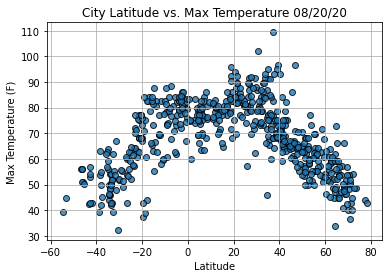

In [35]:
# Import the time module.
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

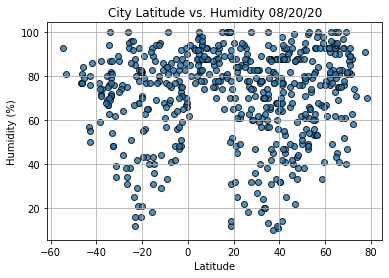

In [36]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

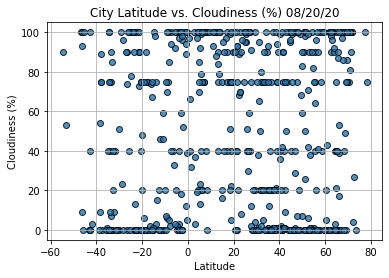

In [37]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

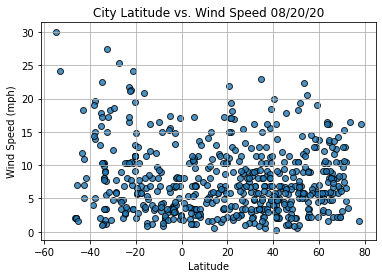

In [38]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()